# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 10.97 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

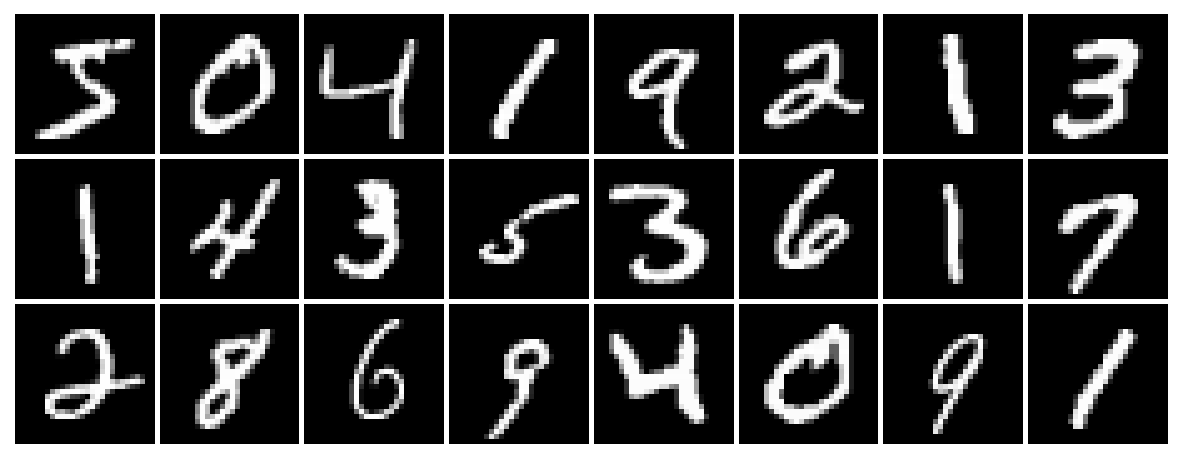

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


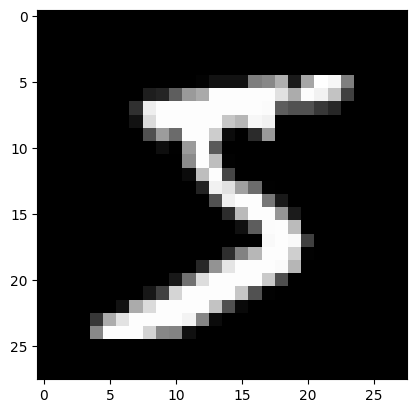

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.0838,  0.2189,  0.1108,  0.4129,  0.0979, -0.1720,  0.0661,  0.3424,
          0.1399, -0.2574],
        [ 0.1809, -0.0924, -0.2674, -0.1058, -0.4158, -0.2112, -0.1032,  0.0511,
         -0.0050, -0.3545],
        [ 0.1123, -0.0434,  0.1611, -0.0061, -0.1811, -0.0183,  0.1613, -0.2412,
          0.0332, -0.3713],
        [-0.3206,  0.1964,  0.0521,  0.1760, -0.0808,  0.1258,  0.1422, -0.1418,
          0.0906, -0.1177],
        [-0.1361,  0.0578,  0.1338, -0.1140, -0.1439,  0.1452, -0.1823, -0.0335,
          0.0107, -0.3936]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [11]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [12]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-ta8zq07h
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-ta8zq07h
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=4caa09ab2dd3250592fa0ba67dad4ead98f334c2464bf0c6d2f73487ce893a50
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_ysidv3/wheels/8a/88/98/69bcb99aba99a6bba9b2b81439cbda0101df40c49e639c4216
Successfully built torchviz


In [13]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.2860, grad_fn=<NllLossBackward0>)

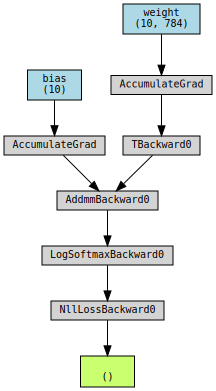

In [14]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Época [1/100], Perda: 0.178516, Acurácia: 0.967000


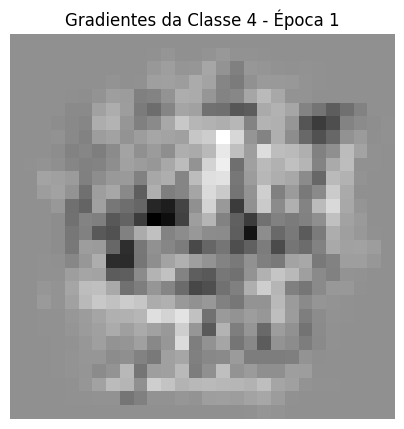

Época [2/100], Perda: 0.177942, Acurácia: 0.967000


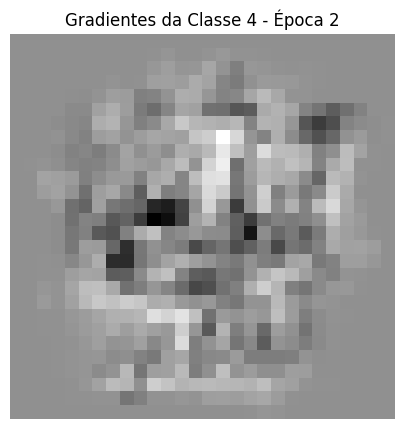

Época [3/100], Perda: 0.177371, Acurácia: 0.967000


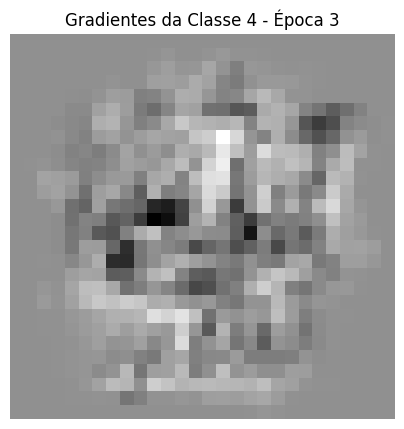

Época [4/100], Perda: 0.176804, Acurácia: 0.967000


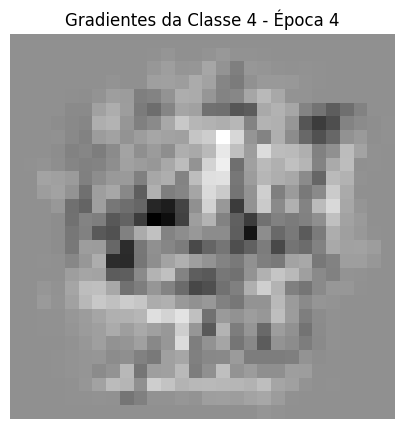

Época [5/100], Perda: 0.176240, Acurácia: 0.967000


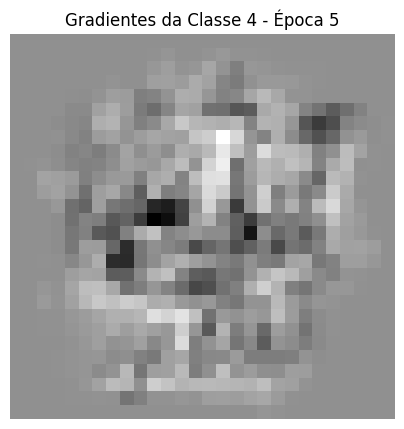

Época [6/100], Perda: 0.175680, Acurácia: 0.967000


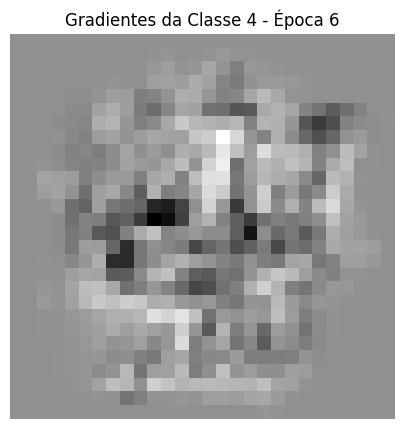

Época [7/100], Perda: 0.175123, Acurácia: 0.967000


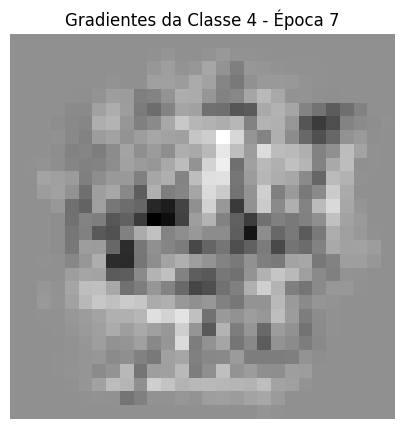

Época [8/100], Perda: 0.174570, Acurácia: 0.967000


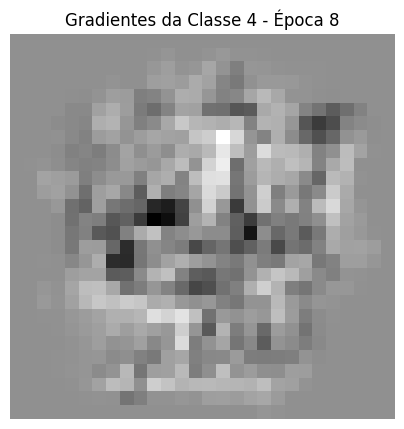

Época [9/100], Perda: 0.174020, Acurácia: 0.967000


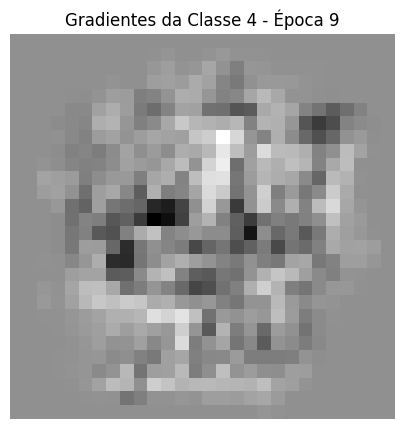

Época [10/100], Perda: 0.173473, Acurácia: 0.967000


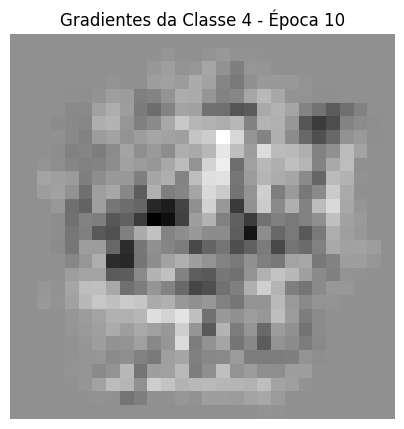

Época [11/100], Perda: 0.172929, Acurácia: 0.968000


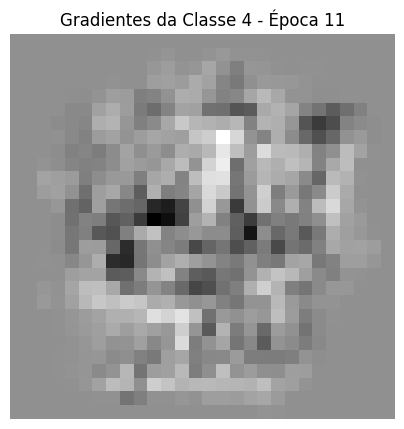

Época [12/100], Perda: 0.172389, Acurácia: 0.968000


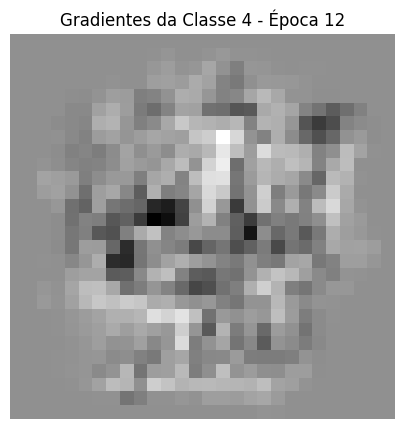

Época [13/100], Perda: 0.171852, Acurácia: 0.968000


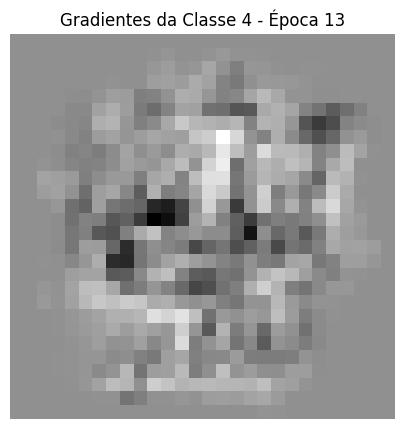

Época [14/100], Perda: 0.171318, Acurácia: 0.969000


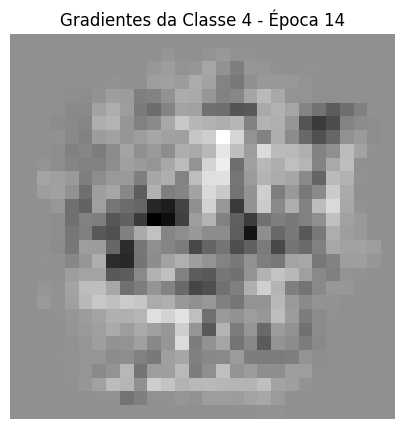

Época [15/100], Perda: 0.170787, Acurácia: 0.969000


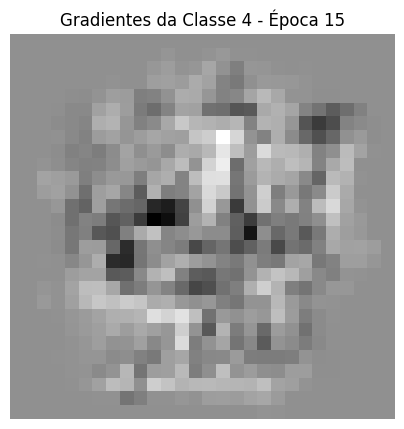

Época [16/100], Perda: 0.170260, Acurácia: 0.969000


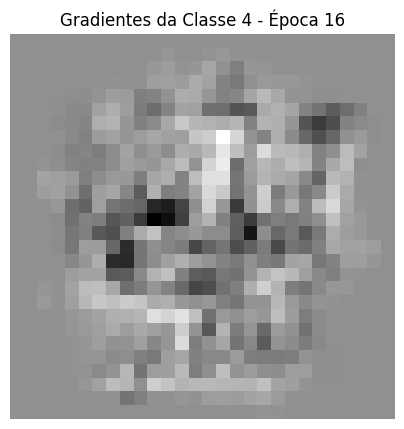

Época [17/100], Perda: 0.169735, Acurácia: 0.969000


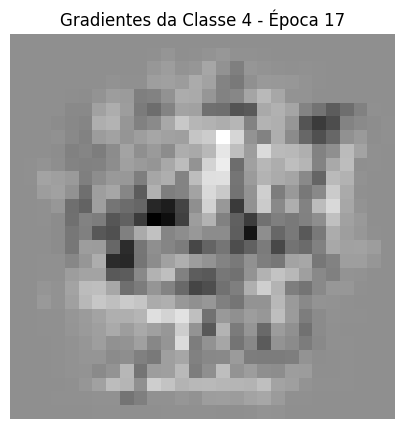

Época [18/100], Perda: 0.169214, Acurácia: 0.969000


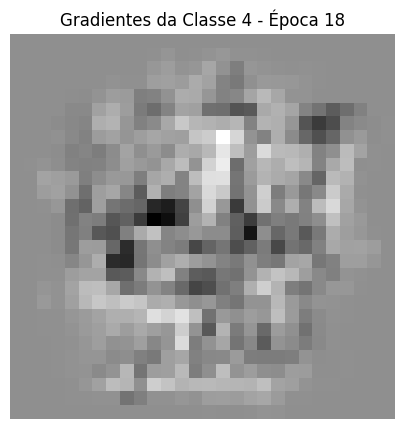

Época [19/100], Perda: 0.168695, Acurácia: 0.969000


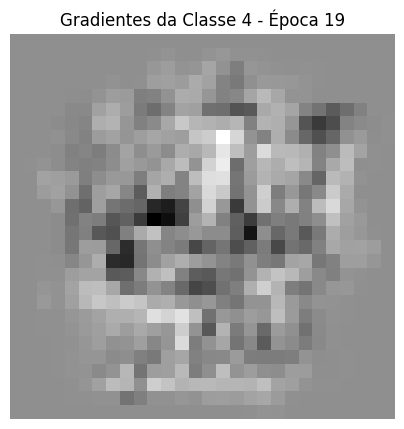

Época [20/100], Perda: 0.168180, Acurácia: 0.969000


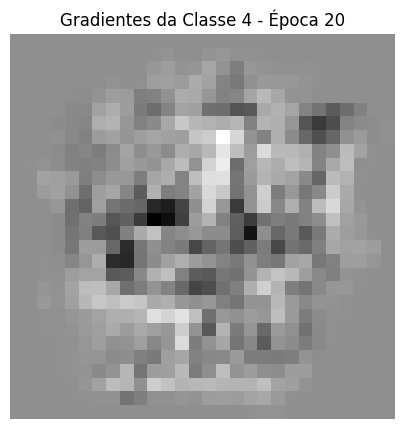

Época [21/100], Perda: 0.167667, Acurácia: 0.969000


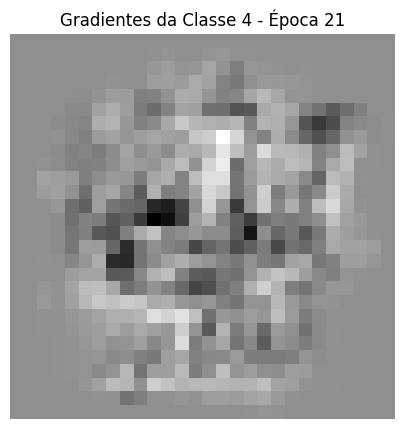

Época [22/100], Perda: 0.167158, Acurácia: 0.969000


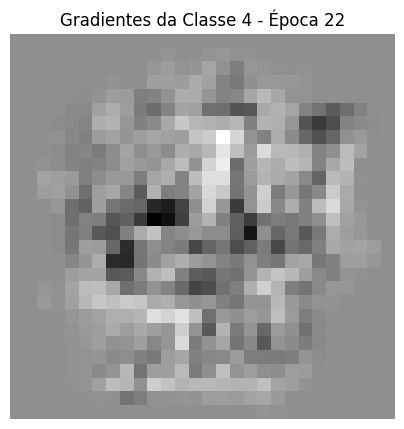

Época [23/100], Perda: 0.166651, Acurácia: 0.969000


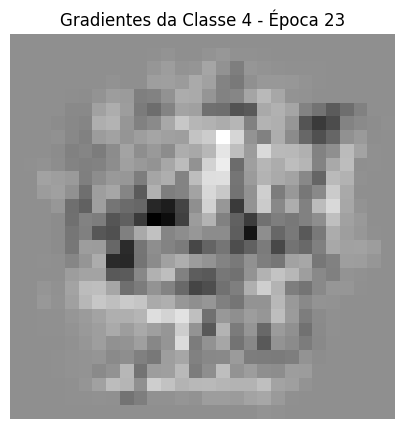

Época [24/100], Perda: 0.166147, Acurácia: 0.969000


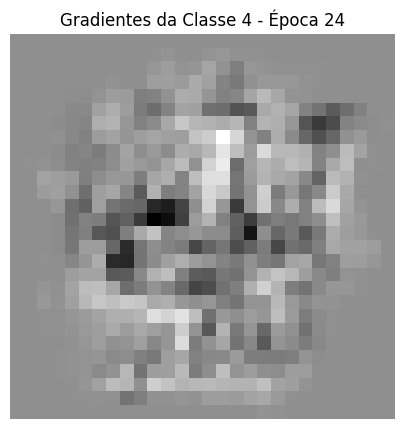

Época [25/100], Perda: 0.165646, Acurácia: 0.969000


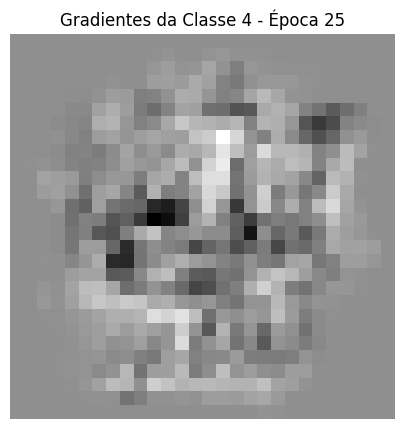

Época [26/100], Perda: 0.165148, Acurácia: 0.969000


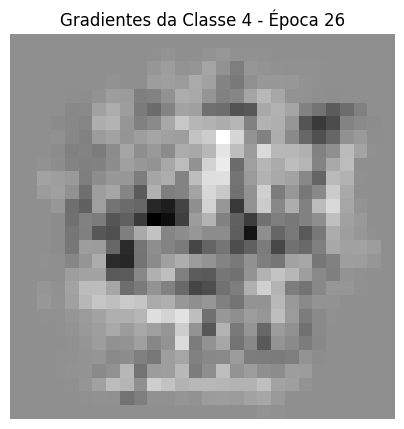

Época [27/100], Perda: 0.164653, Acurácia: 0.969000


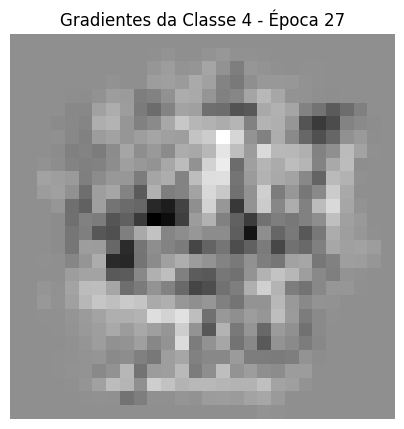

Época [28/100], Perda: 0.164160, Acurácia: 0.970000


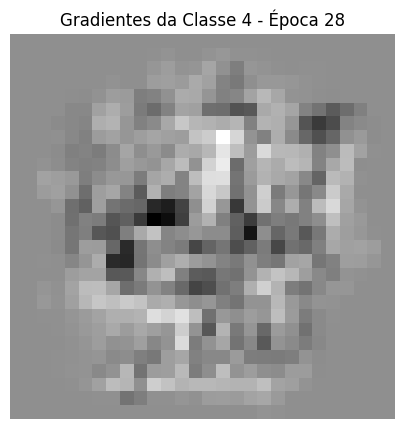

Época [29/100], Perda: 0.163671, Acurácia: 0.970000


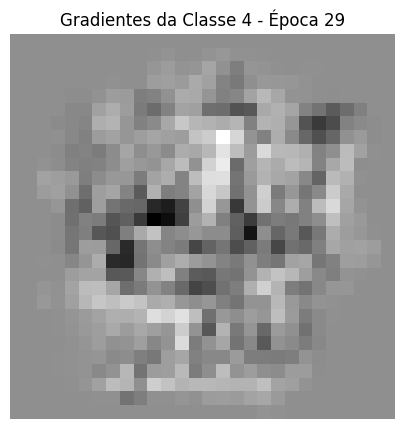

Época [30/100], Perda: 0.163184, Acurácia: 0.971000


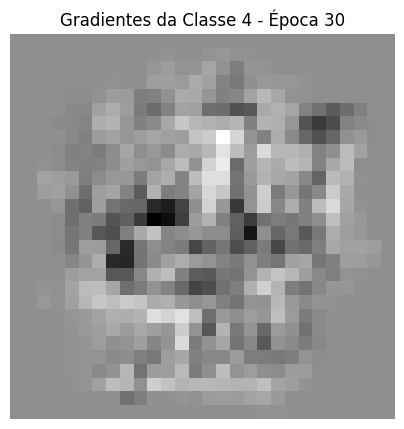

Época [31/100], Perda: 0.162699, Acurácia: 0.971000


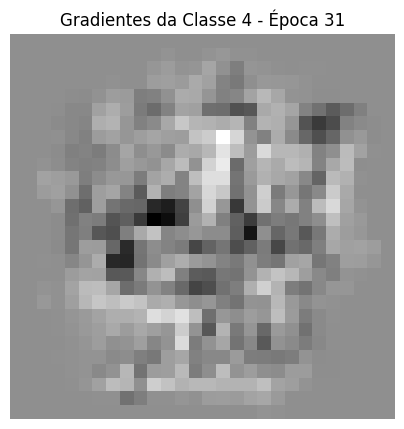

Época [32/100], Perda: 0.162218, Acurácia: 0.971000


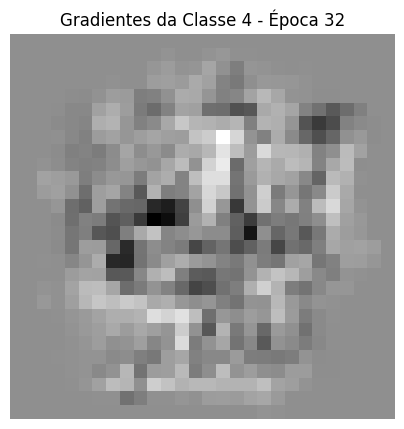

Época [33/100], Perda: 0.161739, Acurácia: 0.971000


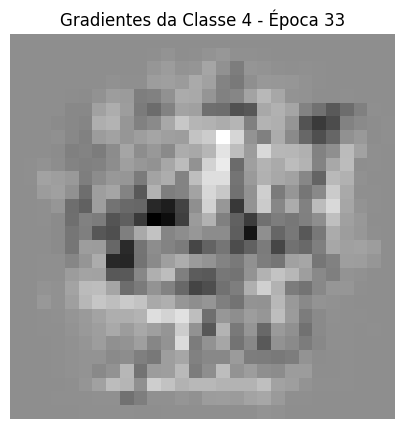

Época [34/100], Perda: 0.161262, Acurácia: 0.971000


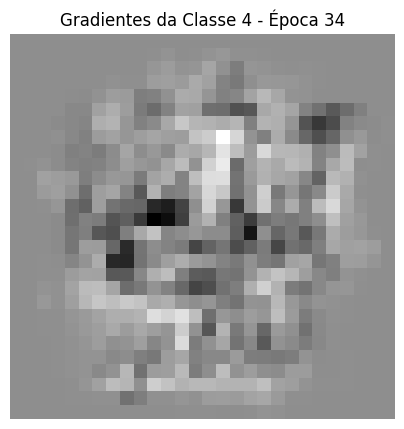

Época [35/100], Perda: 0.160789, Acurácia: 0.971000


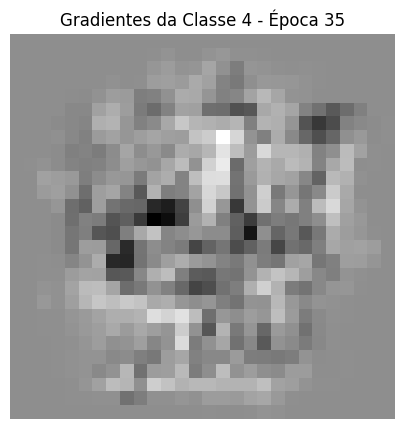

Época [36/100], Perda: 0.160317, Acurácia: 0.971000


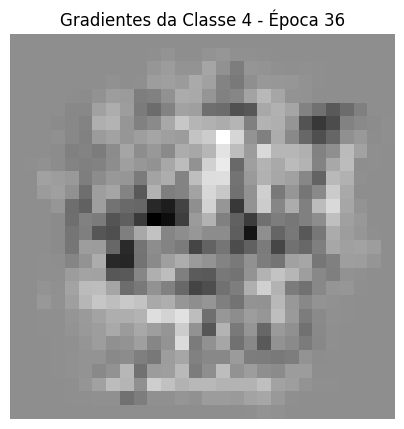

Época [37/100], Perda: 0.159849, Acurácia: 0.971000


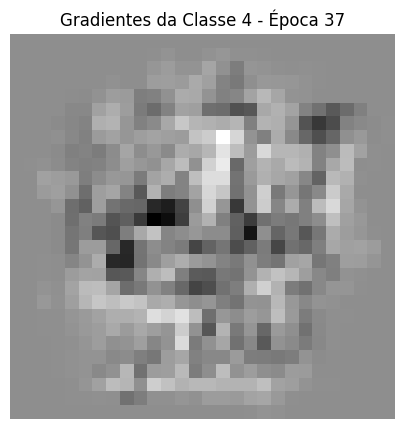

Época [38/100], Perda: 0.159383, Acurácia: 0.971000


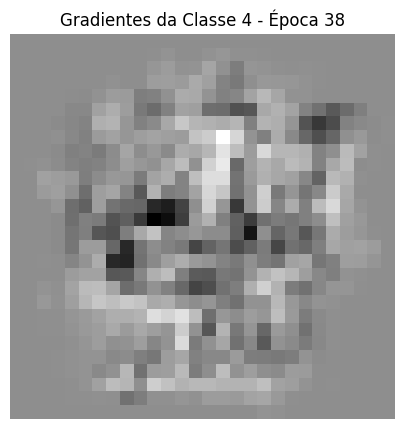

Época [39/100], Perda: 0.158919, Acurácia: 0.971000


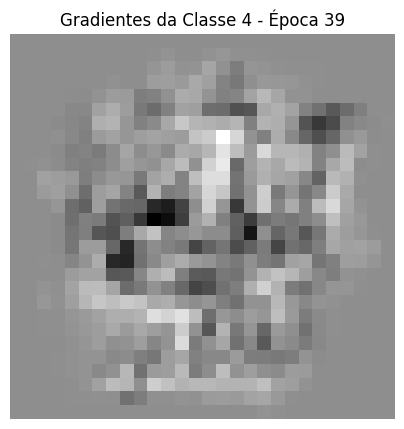

Época [40/100], Perda: 0.158458, Acurácia: 0.971000


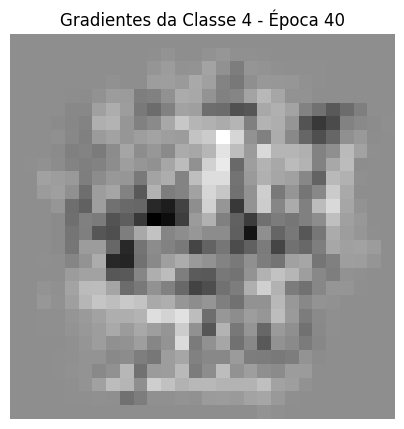

Época [41/100], Perda: 0.158000, Acurácia: 0.971000


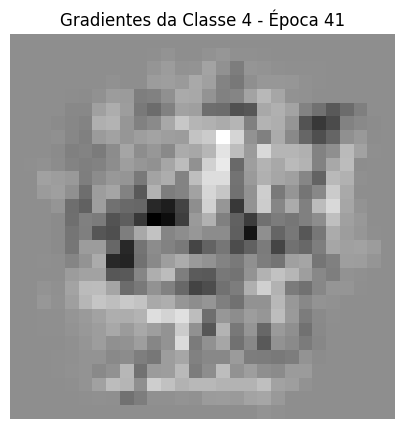

Época [42/100], Perda: 0.157544, Acurácia: 0.971000


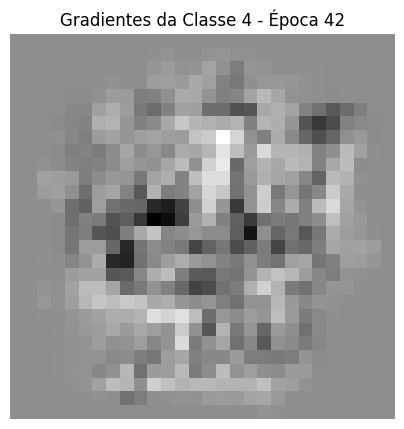

Época [43/100], Perda: 0.157090, Acurácia: 0.972000


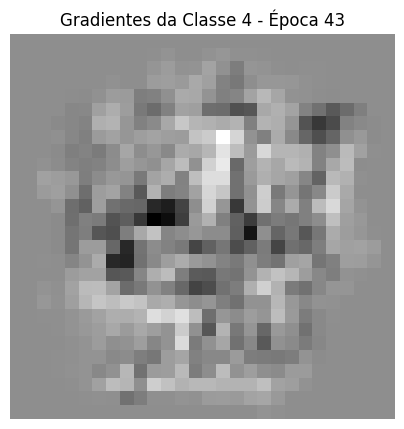

Época [44/100], Perda: 0.156639, Acurácia: 0.972000


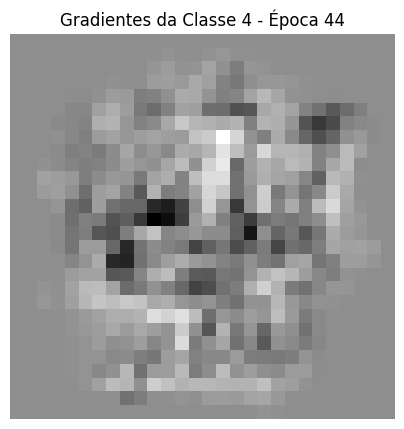

Época [45/100], Perda: 0.156190, Acurácia: 0.972000


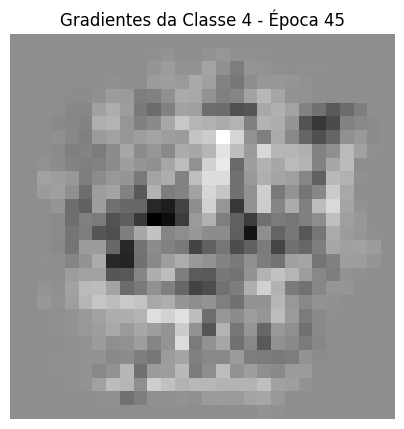

Época [46/100], Perda: 0.155743, Acurácia: 0.972000


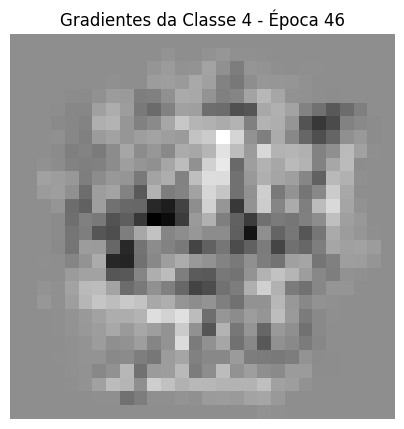

Época [47/100], Perda: 0.155299, Acurácia: 0.972000


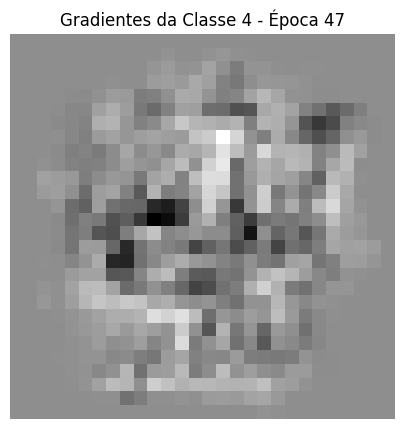

Época [48/100], Perda: 0.154858, Acurácia: 0.972000


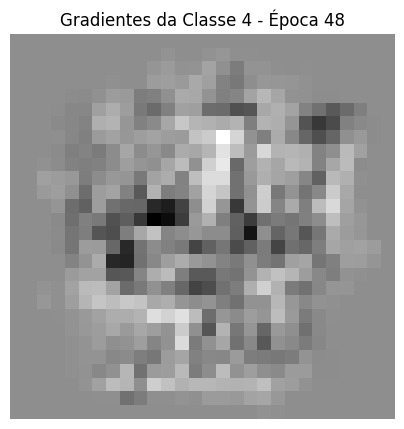

Época [49/100], Perda: 0.154418, Acurácia: 0.972000


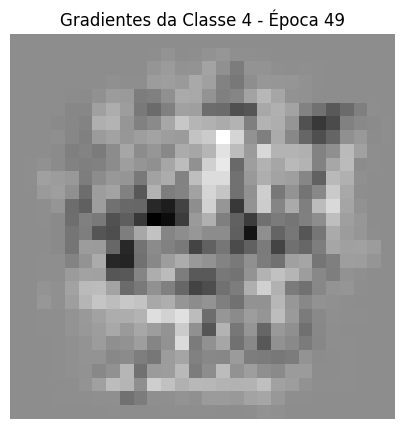

Época [50/100], Perda: 0.153981, Acurácia: 0.973000


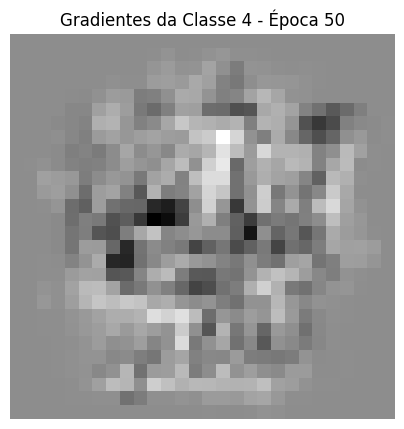

Época [51/100], Perda: 0.153546, Acurácia: 0.973000


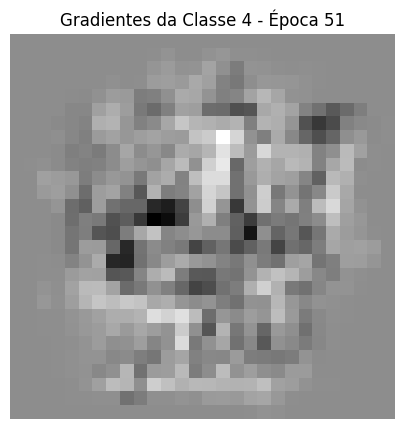

Época [52/100], Perda: 0.153113, Acurácia: 0.973000


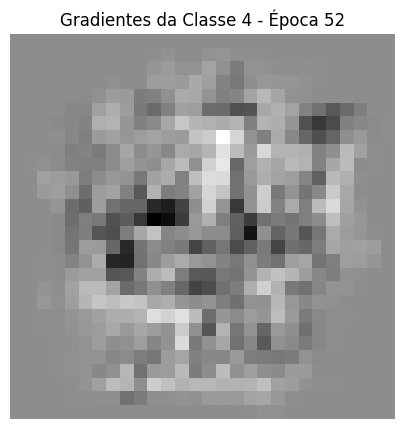

Época [53/100], Perda: 0.152683, Acurácia: 0.973000


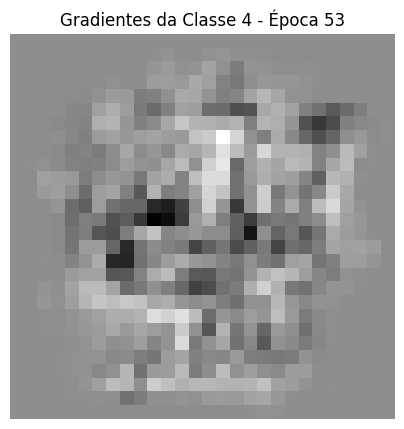

Época [54/100], Perda: 0.152255, Acurácia: 0.973000


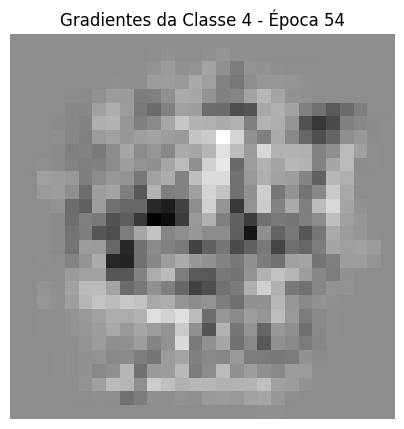

Época [55/100], Perda: 0.151829, Acurácia: 0.973000


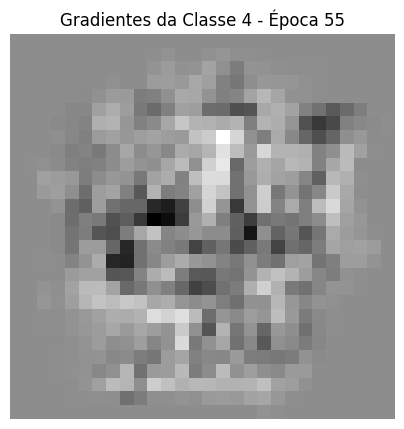

Época [56/100], Perda: 0.151405, Acurácia: 0.973000


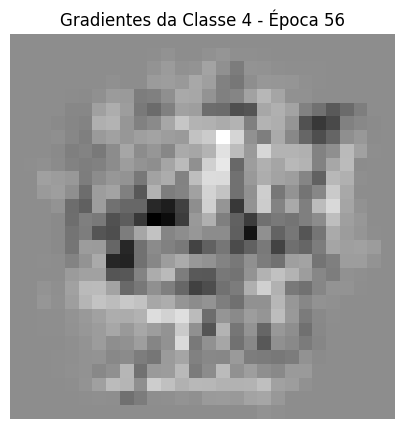

Época [57/100], Perda: 0.150983, Acurácia: 0.973000


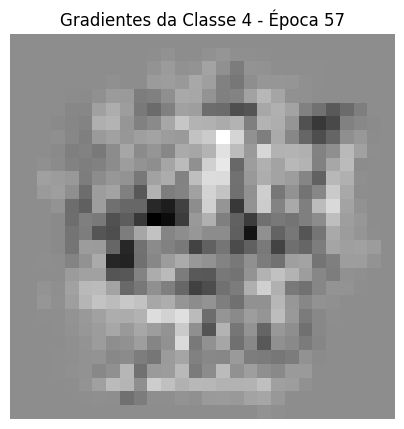

Época [58/100], Perda: 0.150564, Acurácia: 0.973000


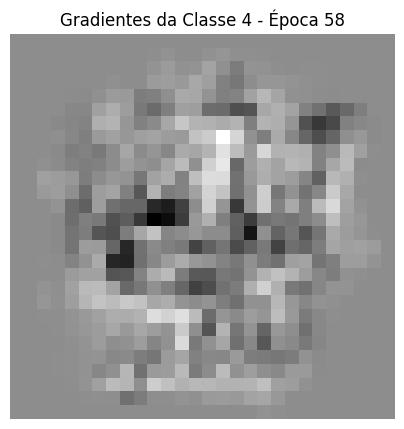

Época [59/100], Perda: 0.150146, Acurácia: 0.973000


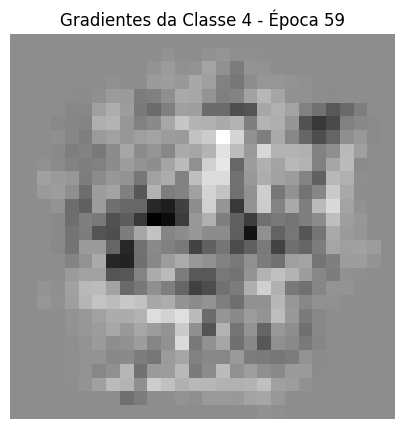

Época [60/100], Perda: 0.149731, Acurácia: 0.973000


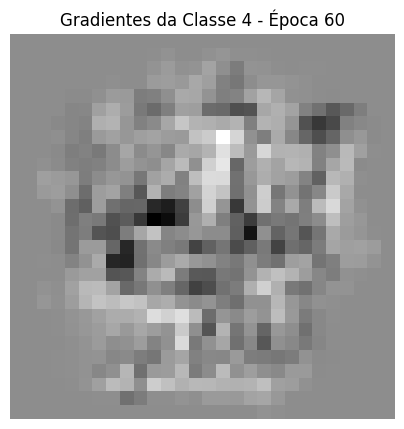

Época [61/100], Perda: 0.149318, Acurácia: 0.973000


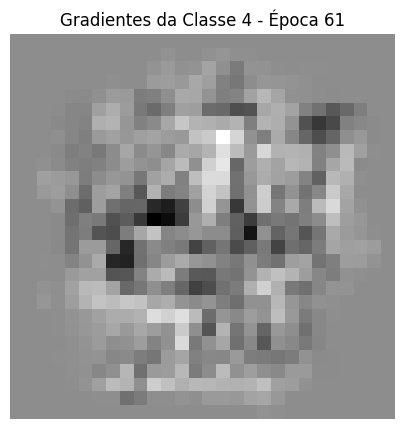

Época [62/100], Perda: 0.148907, Acurácia: 0.973000


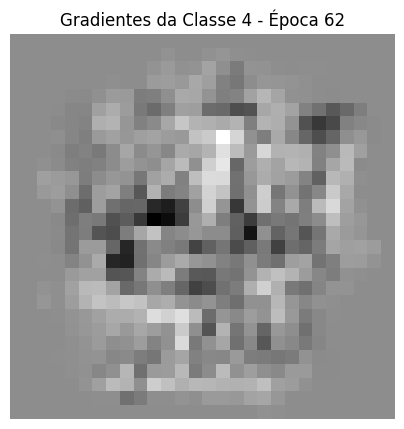

Época [63/100], Perda: 0.148498, Acurácia: 0.973000


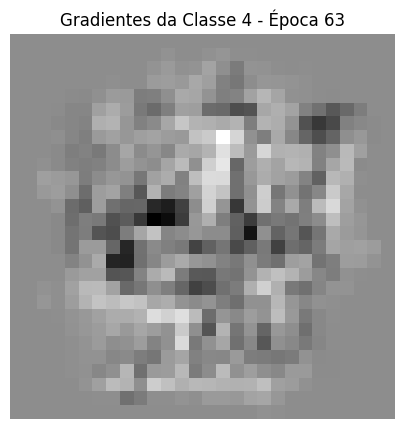

Época [64/100], Perda: 0.148091, Acurácia: 0.973000


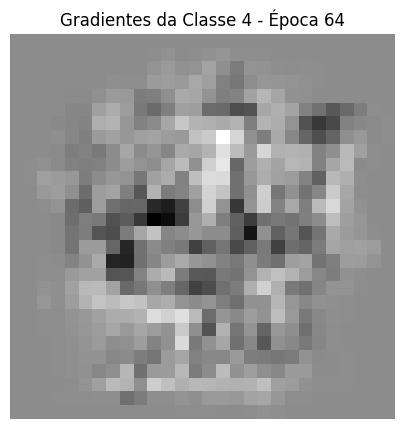

Época [65/100], Perda: 0.147686, Acurácia: 0.973000


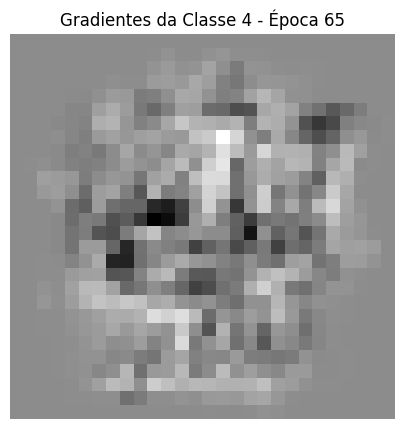

Época [66/100], Perda: 0.147283, Acurácia: 0.974000


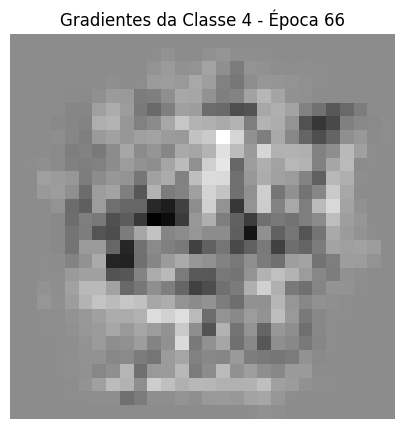

Época [67/100], Perda: 0.146882, Acurácia: 0.974000


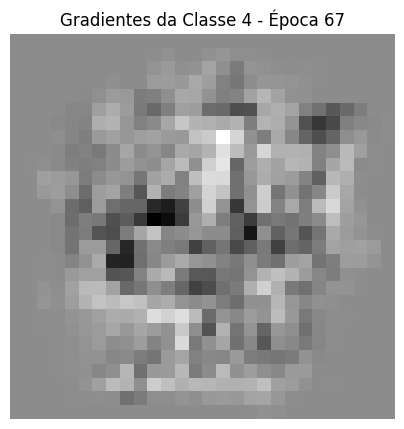

Época [68/100], Perda: 0.146483, Acurácia: 0.974000


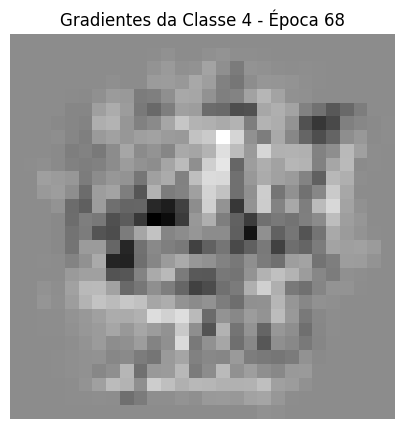

Época [69/100], Perda: 0.146087, Acurácia: 0.974000


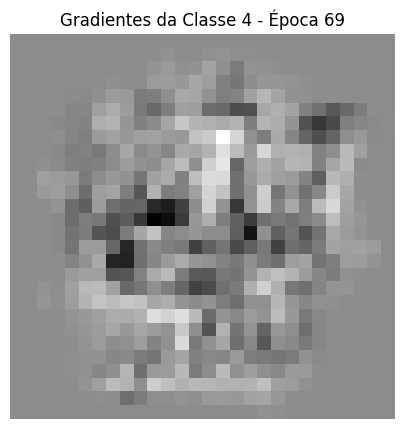

Época [70/100], Perda: 0.145692, Acurácia: 0.974000


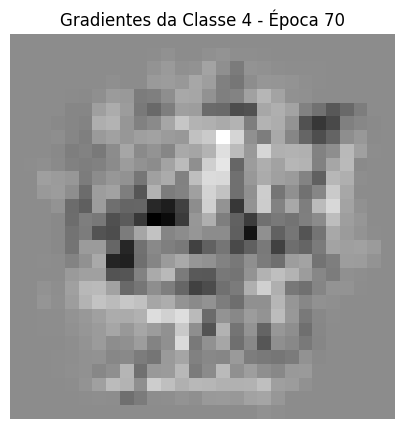

Época [71/100], Perda: 0.145298, Acurácia: 0.975000


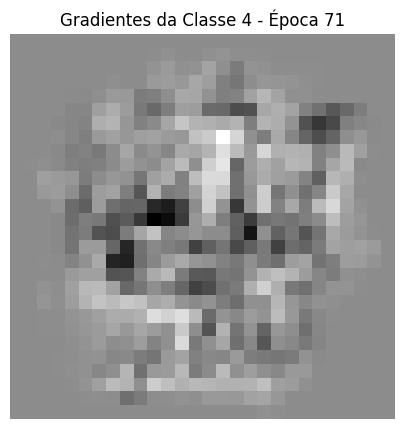

Época [72/100], Perda: 0.144907, Acurácia: 0.976000


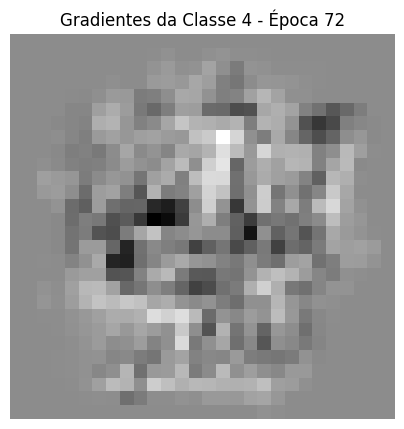

Época [73/100], Perda: 0.144518, Acurácia: 0.976000


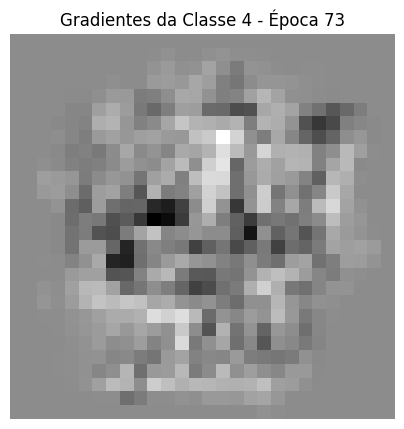

Época [74/100], Perda: 0.144131, Acurácia: 0.976000


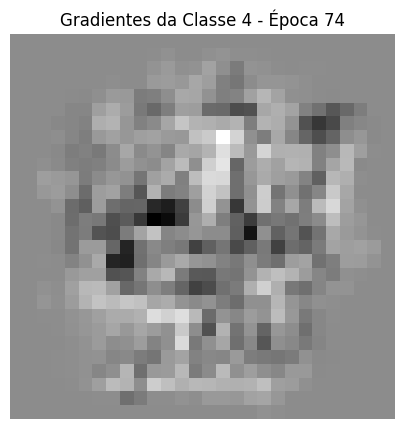

Época [75/100], Perda: 0.143745, Acurácia: 0.976000


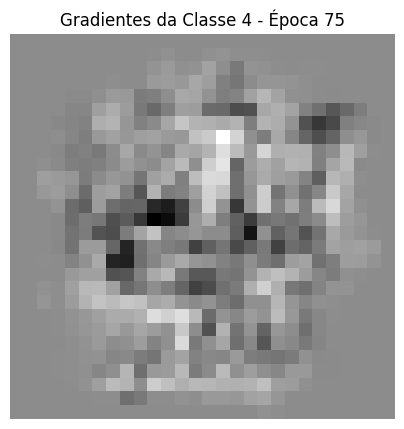

Época [76/100], Perda: 0.143362, Acurácia: 0.976000


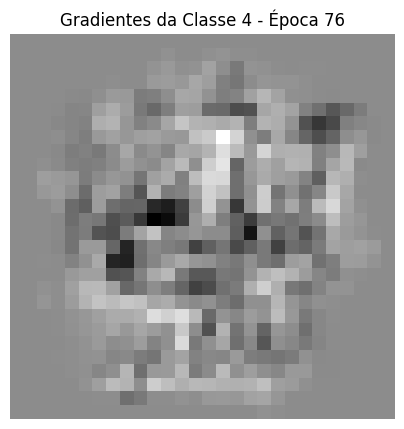

Época [77/100], Perda: 0.142980, Acurácia: 0.976000


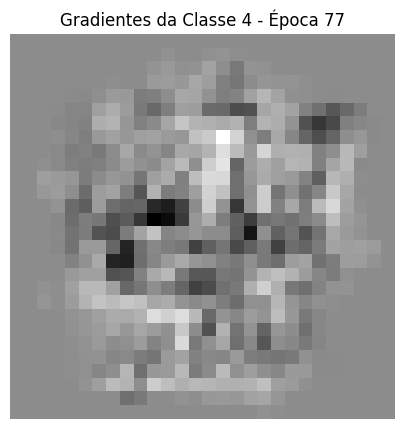

Época [78/100], Perda: 0.142600, Acurácia: 0.976000


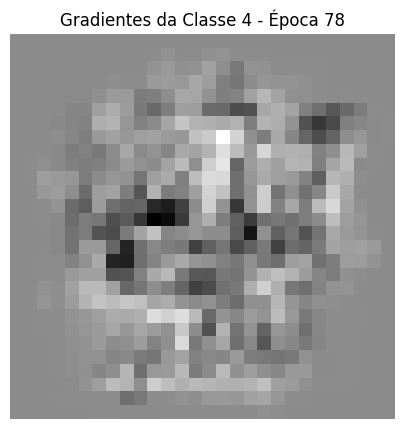

Época [79/100], Perda: 0.142222, Acurácia: 0.976000


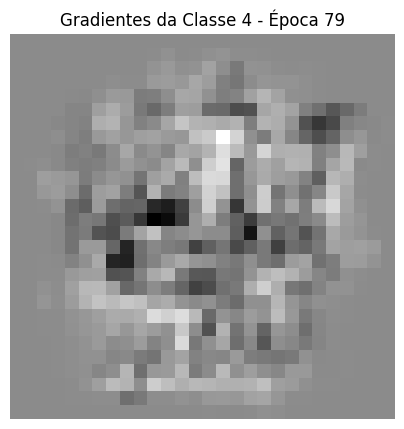

Época [80/100], Perda: 0.141846, Acurácia: 0.976000


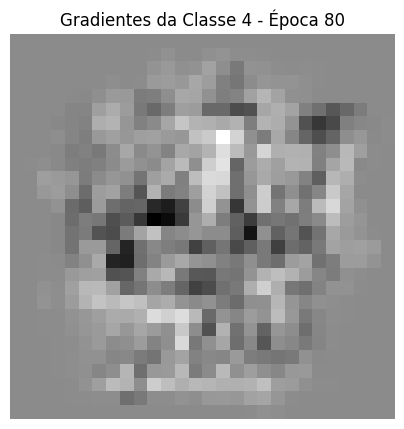

Época [81/100], Perda: 0.141472, Acurácia: 0.976000


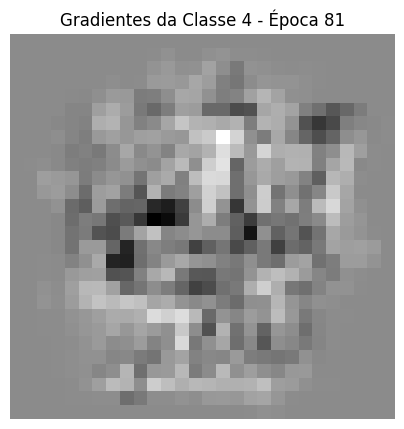

Época [82/100], Perda: 0.141099, Acurácia: 0.976000


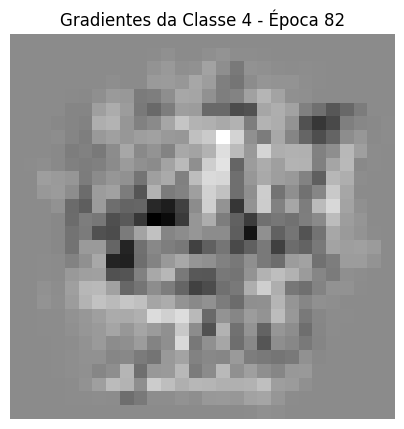

Época [83/100], Perda: 0.140728, Acurácia: 0.976000


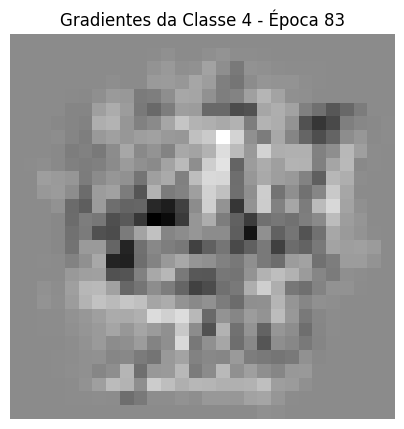

Época [84/100], Perda: 0.140359, Acurácia: 0.976000


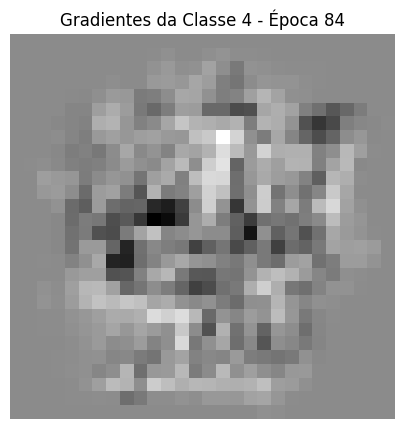

Época [85/100], Perda: 0.139992, Acurácia: 0.976000


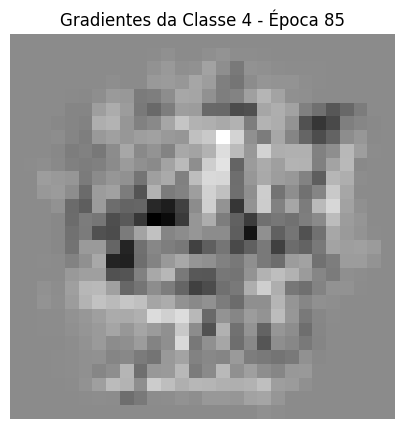

Época [86/100], Perda: 0.139626, Acurácia: 0.976000


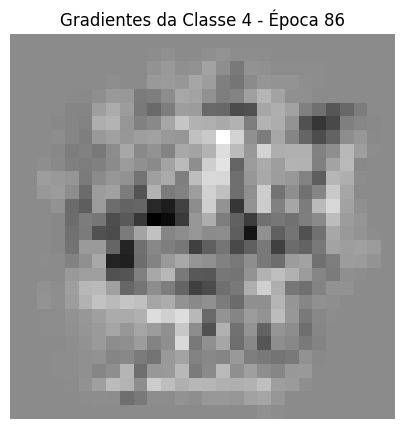

Época [87/100], Perda: 0.139262, Acurácia: 0.976000


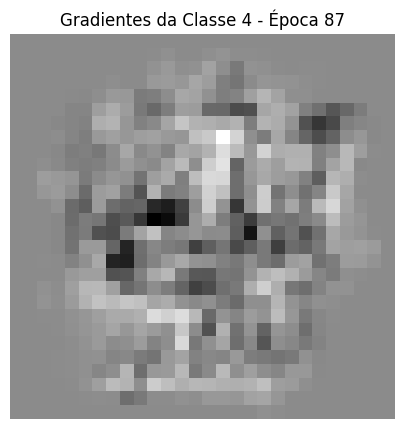

Época [88/100], Perda: 0.138900, Acurácia: 0.976000


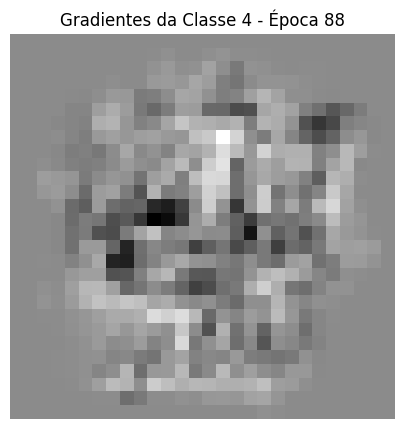

Época [89/100], Perda: 0.138540, Acurácia: 0.976000


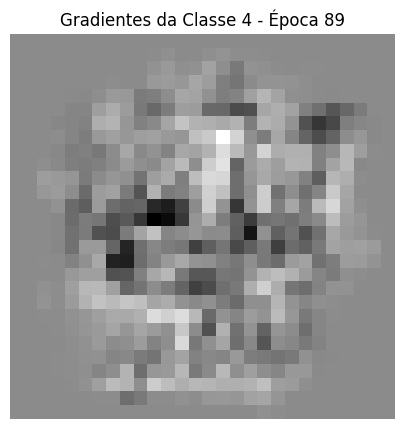

Época [90/100], Perda: 0.138181, Acurácia: 0.976000


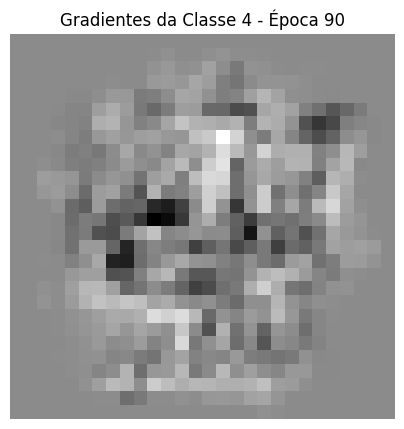

Época [91/100], Perda: 0.137824, Acurácia: 0.976000


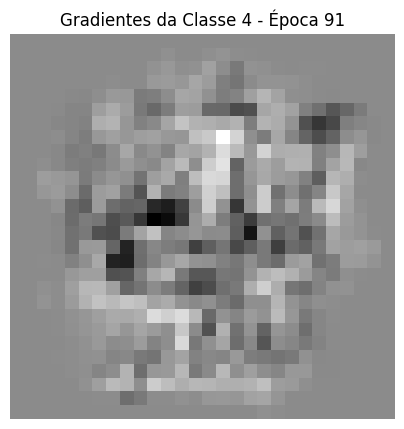

Época [92/100], Perda: 0.137469, Acurácia: 0.976000


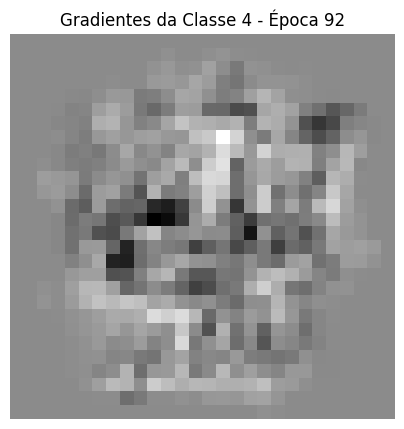

Época [93/100], Perda: 0.137115, Acurácia: 0.976000


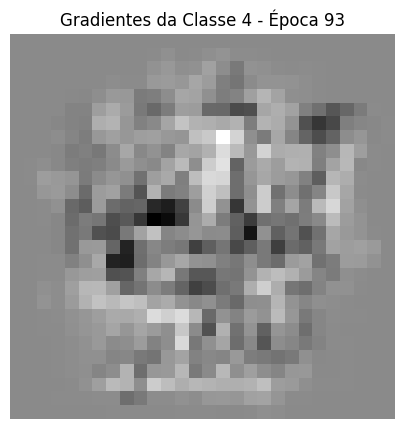

Época [94/100], Perda: 0.136763, Acurácia: 0.976000


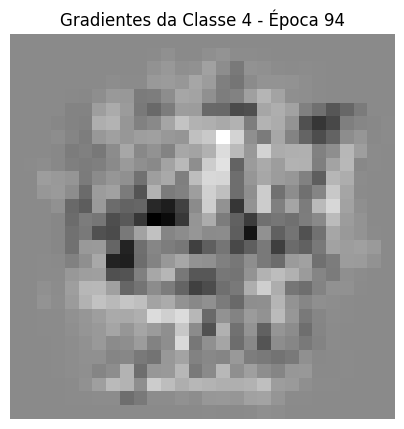

Época [95/100], Perda: 0.136412, Acurácia: 0.976000


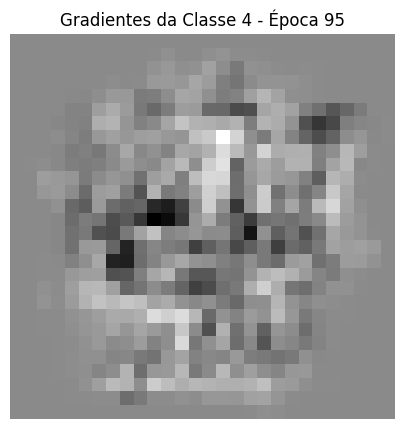

Época [96/100], Perda: 0.136063, Acurácia: 0.976000


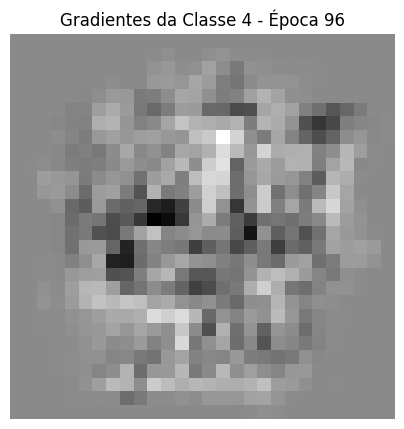

Época [97/100], Perda: 0.135716, Acurácia: 0.977000


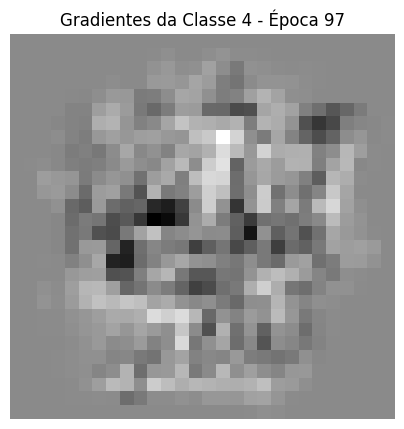

Época [98/100], Perda: 0.135371, Acurácia: 0.977000


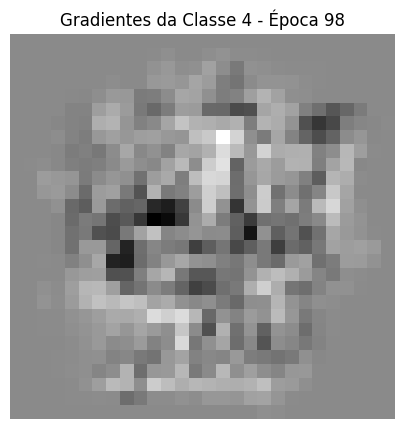

Época [99/100], Perda: 0.135026, Acurácia: 0.977000


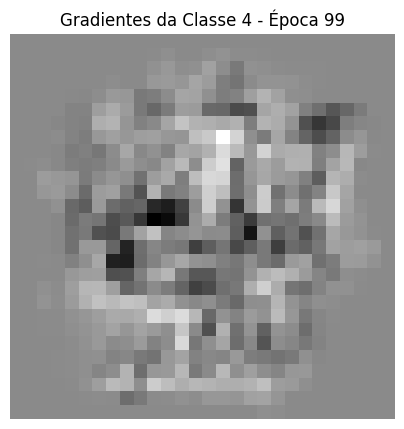

Época [100/100], Perda: 0.134684, Acurácia: 0.978000


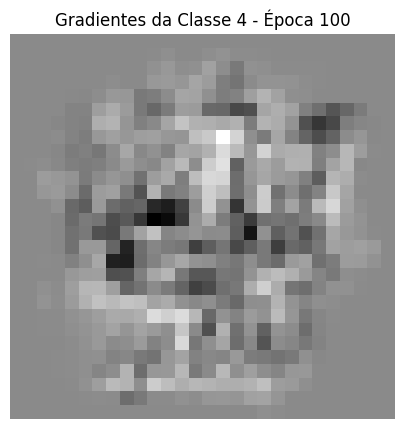

In [23]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print(f'Época [{i+1}/{epochs}], Perda: {loss.item():.6f}, Acurácia: {accuracy:.6f}')

    # Visualização dos gradientes da classe 4
    if model.weight.grad is not None:
        gradients_class_4 = model.weight.grad[4, :].cpu().numpy()
        gradients_image = gradients_class_4.reshape((28, 28))

        plt.figure(figsize=(5, 5))
        plt.imshow(gradients_image, cmap='gray')
        plt.title(f'Gradientes da Classe 4 - Época {i+1}')
        plt.axis('off')
        plt.show()

In [16]:
print('Final loss:', loss.item())

Final loss: 0.2658710181713104


### Visualizando gráfico de perda durante o treinamento

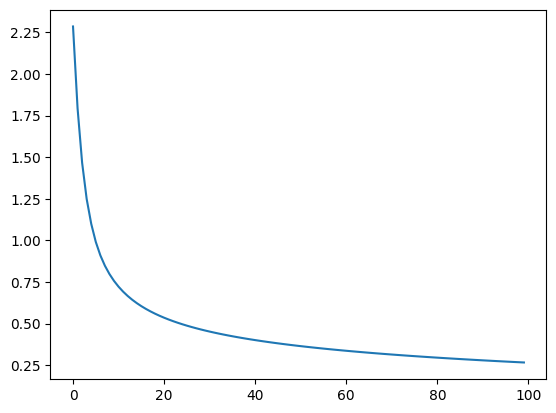

In [17]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [18]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.941


### Matriz de confusão com dados de treinamento e teste

In [19]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,1,3,1,0
2,0,1,91,2,0,1,0,1,1,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,2,1,2,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,1,1,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


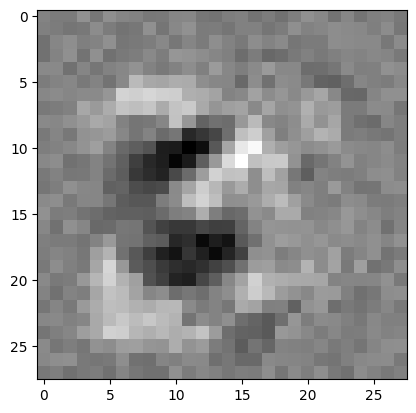

In [20]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

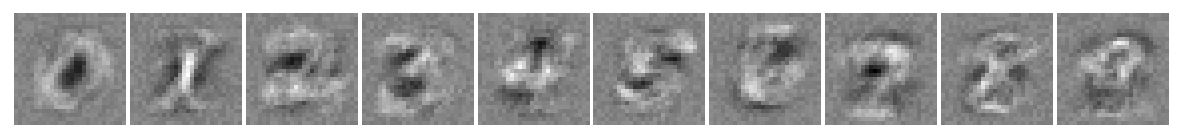

In [21]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
- 1000, 784
2. Qual é o shape da saída da rede?
- 1000,10
3. Qual é o número total de parâmetros da rede, incluindo o bias? 7850

# Aprendizados
